In [1]:
# LDA(Linear Descriminant Analysis) 선형 판별 분석
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_sclaed = StandardScaler().fit_transform(iris.data)

In [3]:
# 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환한다. 
# PCA와 다르게 LDA에서는 비지도학습이 아닌 지도학습이라는 것이다. 
# 즉, 클래스의 결정 값이 변환 시에 필요하다. 

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_sclaed, iris.target)
iris_lda = lda.transform(iris_sclaed)
print(iris_lda.shape)

(150, 2)


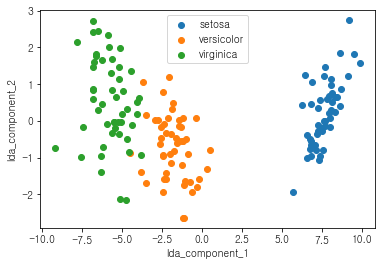

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
  
  plt.scatter(x_axis_data, y_axis_data, label=iris.target_names[i])
  
plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [6]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
pca_X = irisDF_lda[['lda_component_1', 'lda_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print("PCA 변환 데이터 교차 검증 개별 정확도", scores_pca)
print("PCA 변환 데이터 교차 검증 평균 정확도", np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도 [1.   0.9  0.96]
PCA 변환 데이터 교차 검증 평균 정확도 0.9533333333333333
